
##Step1: Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
*   [Skimage](https://scikit-image.org/) is a library which supports image processing applications on python.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.









In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

##Step2: Read Image from Urls

> In this step we will read images from urls, and display them using openCV, please note the difference when reading image in RGB and BGR format. The default input color channels are in BGR format for openCV.

RGB?

#### TODO #1: Read an image from a URL and display it

Image source examples:

[Place Kitten](https://placekitten.com/) - use the base Place Kitten URL followed by a width and height separated by backslashes ''/''. For example, use the URL `https://placekitten.com/500/300` to fetch a cat image with a width of 500px and height of 300px.

[NC State University Libraries Special Collections](https://d.lib.ncsu.edu/collections/catalog) - browse the site to find an image thumbnail. Right-click on the thumbnail and select "Copy Image Address". The address will look like this: `https://iiif.lib.ncsu.edu/iiif/0051230/square/300,/0/default.jpg`. Replace the word "square" with the word "full" and replace "300" with "800" to access the full image at a width of 800px.

[Google Image search](https://www.google.com/imghp?hl=en) - search for an image. Left-click one of the returned images, then right-click on the full image, and then select "Copy Image Address".

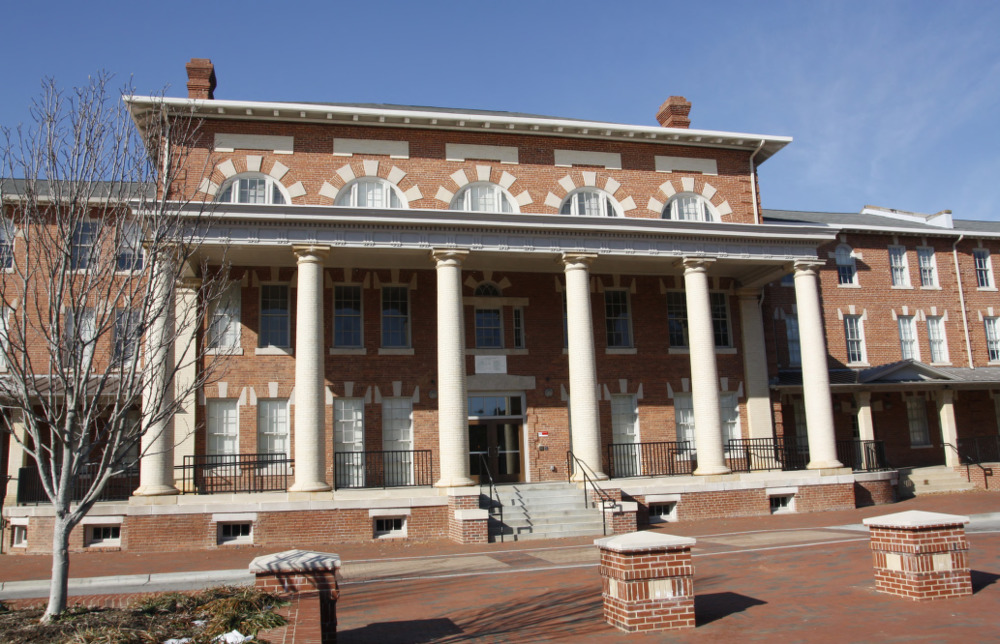

In [ ]:
## TODO: LOAD IMAGE
url = 'https://iiif.lib.ncsu.edu/iiif/mc00336-1911-Bldg-2-Dec2010/full/1000,644/0/default.jpg'
myImg = io.imread(url)  
cv2_imshow(cv.cvtColor(myImg, cv.COLOR_BGR2RGB))


##Step3: Image Contours and Histograms

In [ ]:
# Check the image matrix data type (could know the bit depth of the image)
print(myImg.dtype)
# Check the height of image 0-->row, 1-->column, 2-->channel
print(myImg.shape[0])
# Check the width of image 
print(myImg.shape[1])
# Check the number of channels of the image
print(myImg.shape[2])

uint8
644
1000
3


### Generate Histogram of color image and grayscale image
Sometimes you want to enhance the contrast in your image or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the matplot.pylab `hist()` function.

More info: [Histogram](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html)

Display the histogram of all the pixels in the color image

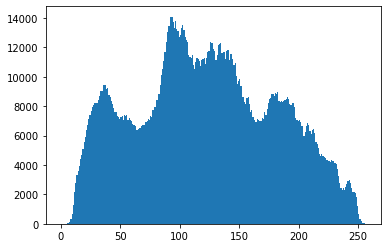

In [ ]:
plt.hist(myImg.ravel(),bins = 256, range = [0,256]) 
plt.show()

Display the histogram of R, G, B channel
We could observe that the green channel has many pixels in 255, which represents the white patch in the image

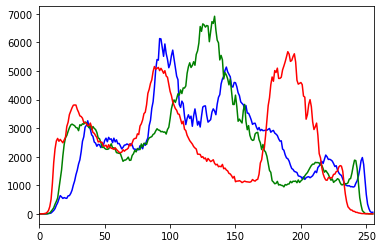

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([myImg],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

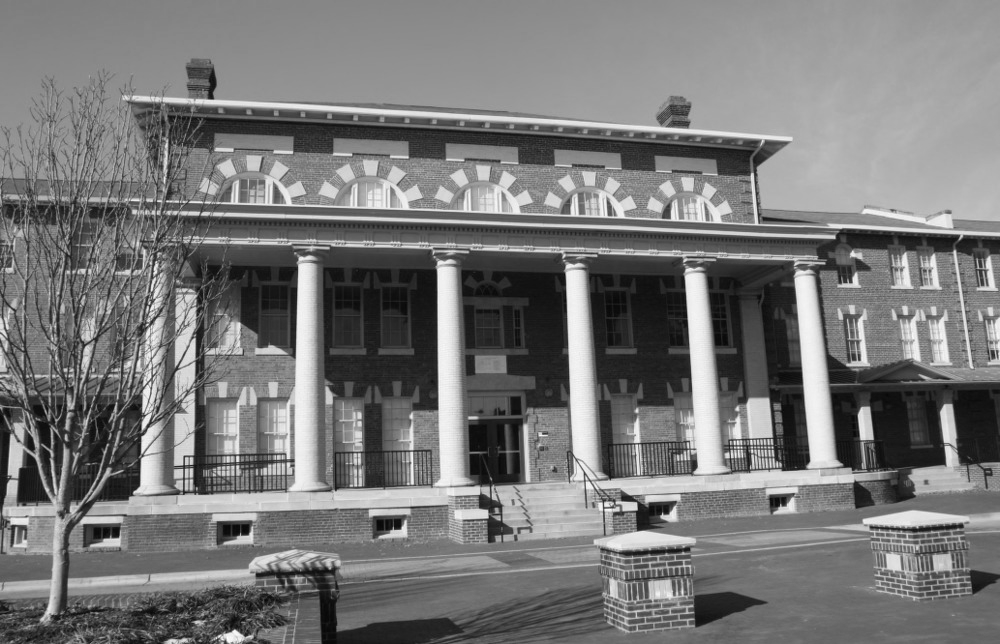

In [ ]:
gray_image = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
noise = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
cv2_imshow(noise)

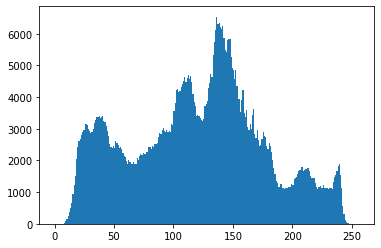

In [ ]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

Image filtering

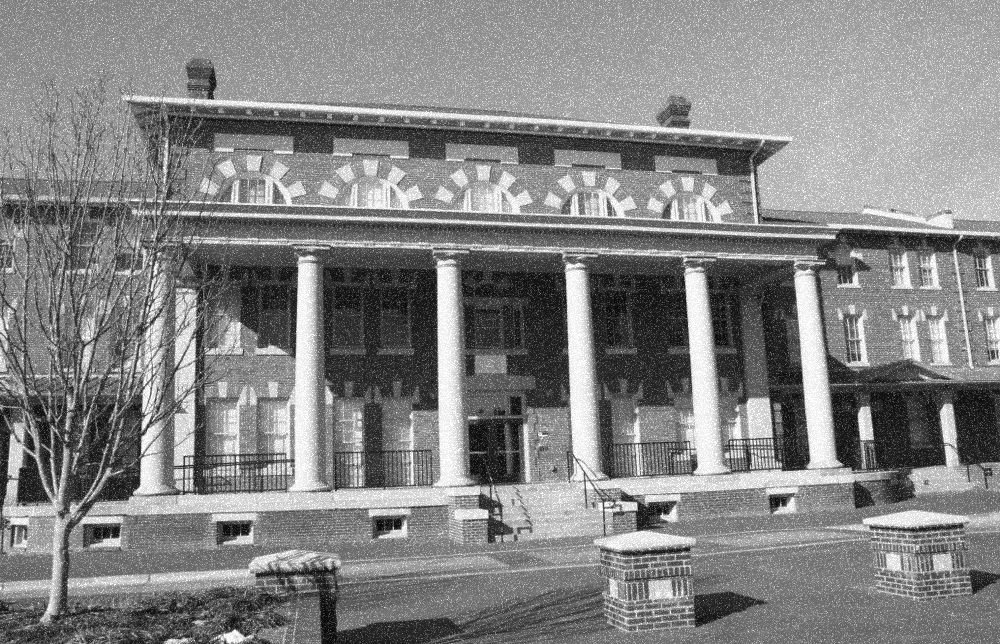

In [ ]:
# gray_image = noisy("gauss", gray_image)
cv.randn(noise, 0, 30) #สร้าง noise
# ex = gray_image+noise
add = cv.add(gray_image,noise)
cv2_imshow(add)

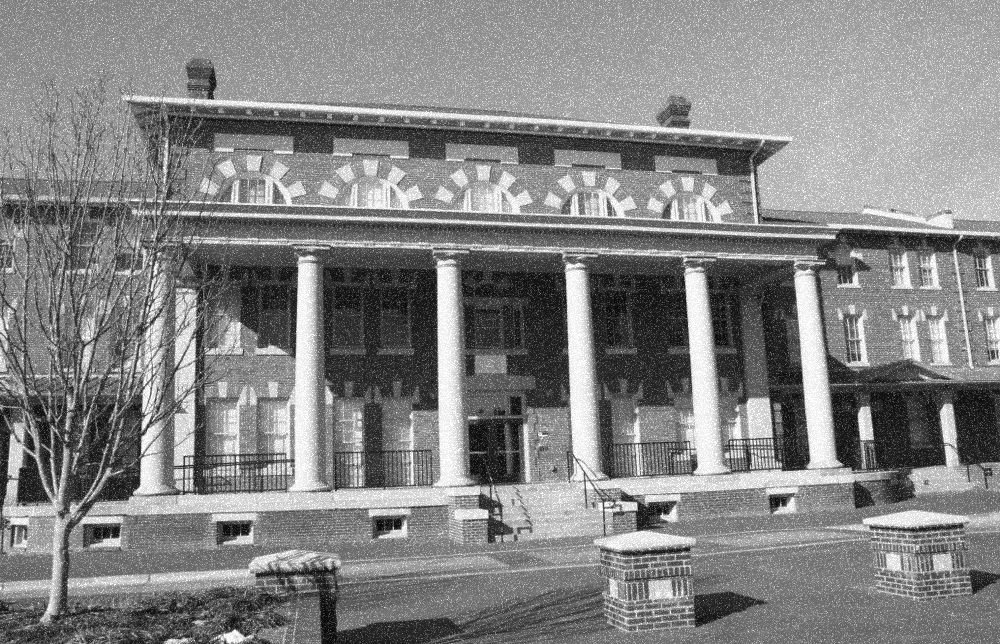

In [ ]:
height, width = add.shape[:2]
# add = cv.resize(add,(width//2, height//2), interpolation = cv.INTER_CUBIC)
cv2_imshow(add)

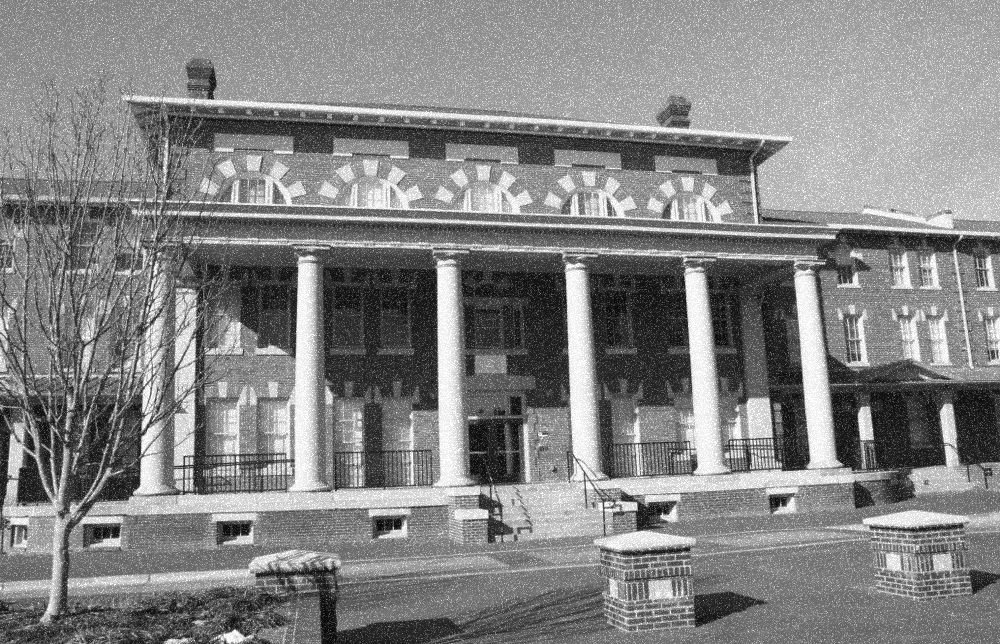

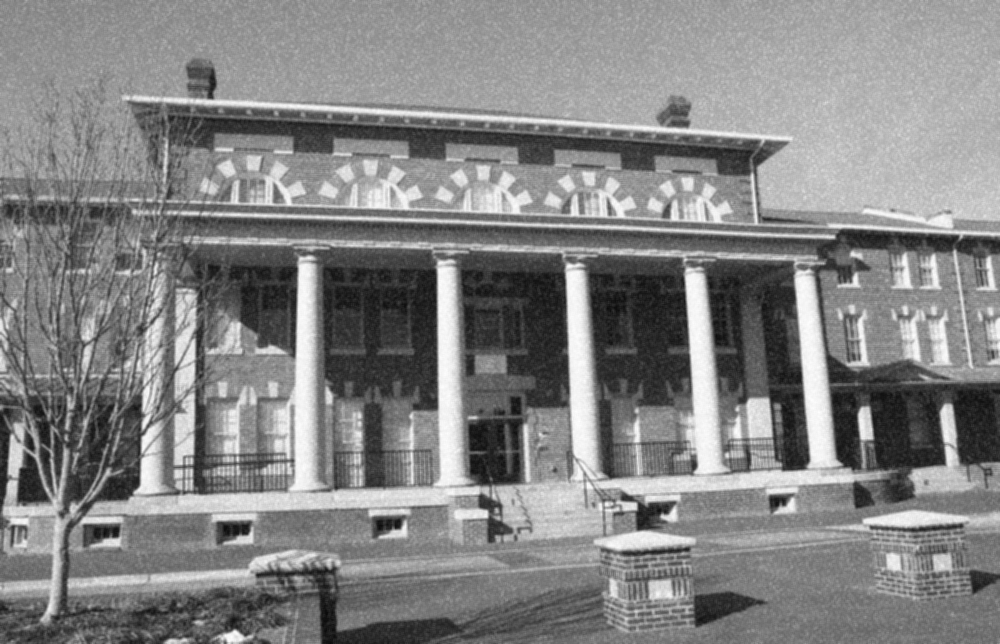

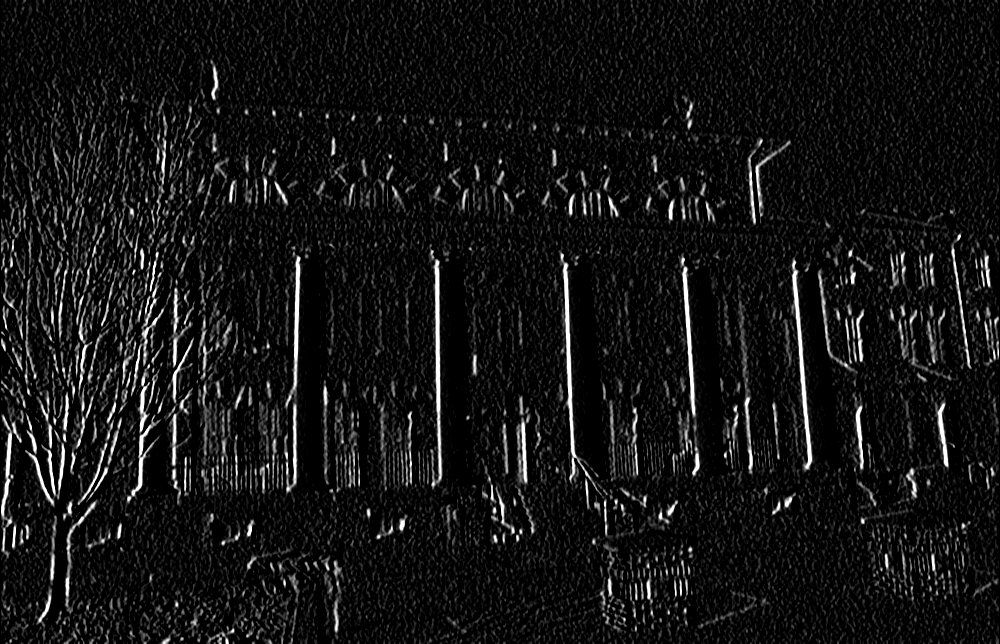

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


In [ ]:
#smoothing filter
#mean filter
kernel = np.ones((3,3),np.float32)/9
#edge detection filter
kernel_edge = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
mean = cv.filter2D(add,-1,kernel)
edge = cv.filter2D(mean,-1,kernel_edge)
cv2_imshow(add)
cv2_imshow(mean)
cv2_imshow(edge)
print(kernel)
print(kernel_edge)

In [ ]:
print(kernel)
print(kernel_edge)

In [ ]:
guassian = cv.GaussianBlur(add,(3,3),0)
median = cv.medianBlur(add,3)
blur2 = cv.bilateralFilter(add,3,75,75)
cv2_imshow(mean)
cv2_imshow(guassian)
cv2_imshow(median)
cv2_imshow(blur2)

# plt.subplot(121),plt.imshow(add, cmap='gray'),plt.title('Original')
# plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(guassian, cmap='gray'),plt.title('Blurred')
# plt.xticks([]), plt.yticks([])
# plt.show()

In [ ]:
grad_x = cv.Sobel(add, -1, 1, 0, ksize=3, borderType=cv.BORDER_DEFAULT)
    # Gradient-Y
    # grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv.Sobel(add, -1, 0, 1, ksize=3, borderType=cv.BORDER_DEFAULT)
grad_x_gray = cv.Sobel(guassian, -1, 0, 1, ksize=3, borderType=cv.BORDER_DEFAULT)
grad_y_gray = cv.Sobel(guassian, -1, 1, 0, ksize=3, borderType=cv.BORDER_DEFAULT)
cv2_imshow(grad_y)
cv2_imshow(grad_x)
cv2_imshow(grad_x_gray)
cv2_imshow(grad_y_gray)
